In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_excel("./data/Course Recommendation System(1-128).xlsx")
df.drop(df.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True)
df = df.fillna(0.5)

# df = df.dropna()
A = df.to_numpy()
A[45]

array([1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [5]:
u, s, vh = np.linalg.svd(A, full_matrices=False)
A = u @ np.diag(s) @ vh
A[45]

array([1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

### K-Means

In [6]:
class K_Means():

	def __init__(self, n_clusters, n_init) -> None:
		self.n_clusters = n_clusters
		self.n_init = n_init

	def fit(self, X, n_iter):
		self.clusters = self._get_clusters(X)
		self.c_assignment = []
		self.inertia = np.Inf

		# print("Cluster Size \t\t\t\t Inertia")
		for _ in range(self.n_init):
			clusters = self._get_clusters(X)
			c_assignment = self._assign_cluster(clusters, X)

			for _ in range(n_iter):
				clusters = self._new_clusters(c_assignment, X)
				c_assignment = self._assign_cluster(clusters, X)

			new_inertia = self.calc_inertia(c_assignment, clusters, X)
			# print(np.unique(c_assignment, return_counts=True)[1], "\t\t\t\t", new_inertia)

			if(new_inertia < self.inertia):
				self.clusters = clusters
				self.c_assignment = c_assignment
				self.inertia = new_inertia

		# print("\nFinal Result -\n", np.unique(self.c_assignment, return_counts=True)[1], "\t\t\t\t", self.calc_inertia(self.c_assignment, self.clusters, X))

	def _assign_cluster(self, clusters, X):

		cluster_assignment = np.ones(X.shape[0], dtype=np.int8)
		for ind, i in enumerate(X):
			cluster_assignment[ind] = self.find_cluster(clusters, i)

		return cluster_assignment

	def find_cluster(self, clusters, x):
		
		dist = []
		for j in clusters:
			dist.append(np.linalg.norm(x - j))

		return dist.index(min(dist))

	def _new_clusters(self, cluster_assignment, X):

		clusters = []
		for i in range(self.n_clusters):
			temp = X[np.where(cluster_assignment == i)]
			
			if(temp.shape[0] == 0):
				temp = X[np.random.randint(0, X.shape[0], 1)[0]].reshape([1, -1])
		
			clusters.append(np.mean(temp, axis=0))

		return clusters

	def get_cluster_size(self):
		return np.unique(self.c_assignment, return_counts=True)[1]


	def calc_inertia(self, c_assignment, clusters, X):
		inertia = 0;
		for ind, i in enumerate(X):
			inertia += np.linalg.norm(clusters[c_assignment[ind]] - i)**2

		return inertia

	def _get_clusters(self, X):
		return X[np.random.randint(0, X.shape[0], self.n_clusters), :]

In [7]:
n_clusters = 2
n_init = 10
kmeans = K_Means(n_clusters, n_init)
kmeans.fit(A, 100)
kmeans.get_cluster_size()

array([86, 42])

In [8]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2).fit(A)

np.unique(kmean.labels_, return_counts=True)[1]

array([43, 85])

#### Optimal K (Using Elbow Method)

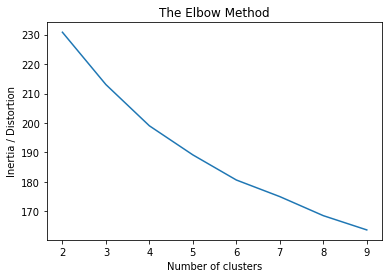

In [9]:
Inertia = []

for i in range(2, 10):
	kmeans = K_Means(i, 10)
	kmeans.fit(A, 100)
	Inertia.append(kmeans.inertia)

plt.plot(range(2, 10), Inertia)
plt.xticks(range(2, 10))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia / Distortion')
plt.show()

#### Inference - KMeans